<a href="https://colab.research.google.com/github/malvarezgarcia1213-png/Project-I-Deep-Learning-Image-Classification-with-CNN/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assessment Components
1. Data Preprocessing:

- Data loading and preprocessing (e.g., normalization, resizing, augmentation).
- Create visualizations of some images, and labels.

In [41]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'animals10' dataset.
Path to dataset files: /kaggle/input/animals10


In [49]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
dataset_dir = "/kaggle/input/animals10/raw-img"  # Ajusta según donde esté tu carpeta

# Diccionario de traducción italiano -> inglés
translate_to_english = {
    "cane": "dog",
    "gatto": "cat",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "mucca": "cow",
    "pecora": "sheep",
    "ragno": "spider",
    "scoiattolo": "squirrel"
}

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalizar pixeles
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2       # 20% de validación
)

# Para validación solo normalizamos
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [34]:
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalización: convierte los valores de píxeles [0–255] → [0–1]
    validation_split=0.2,     # División: 80% entrenamiento / 20% validación
    rotation_range=25,        # Rotaciones aleatorias (augmentación)
    width_shift_range=0.2,    # Desplazamiento horizontal
    height_shift_range=0.2,   # Desplazamiento vertical
    shear_range=0.2,          # Transformación de corte
    zoom_range=0.2,           # Zoom aleatorio
    horizontal_flip=True,     # Volteo horizontal
    fill_mode='nearest'       # Cómo rellenar los píxeles vacíos tras una transformación
)

In [56]:
img_height, img_width = 128, 128
batch_size = 32

train_gen = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [57]:
train_gen.class_indices = {translate_to_english[k]: v for k, v in train_gen.class_indices.items()}
val_gen.class_indices   = {translate_to_english[k]: v for k, v in val_gen.class_indices.items()}

print("Clases en inglés:", train_gen.class_indices)

Clases en inglés: {'dog': 0, 'horse': 1, 'elephant': 2, 'butterfly': 3, 'chicken': 4, 'cat': 5, 'cow': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


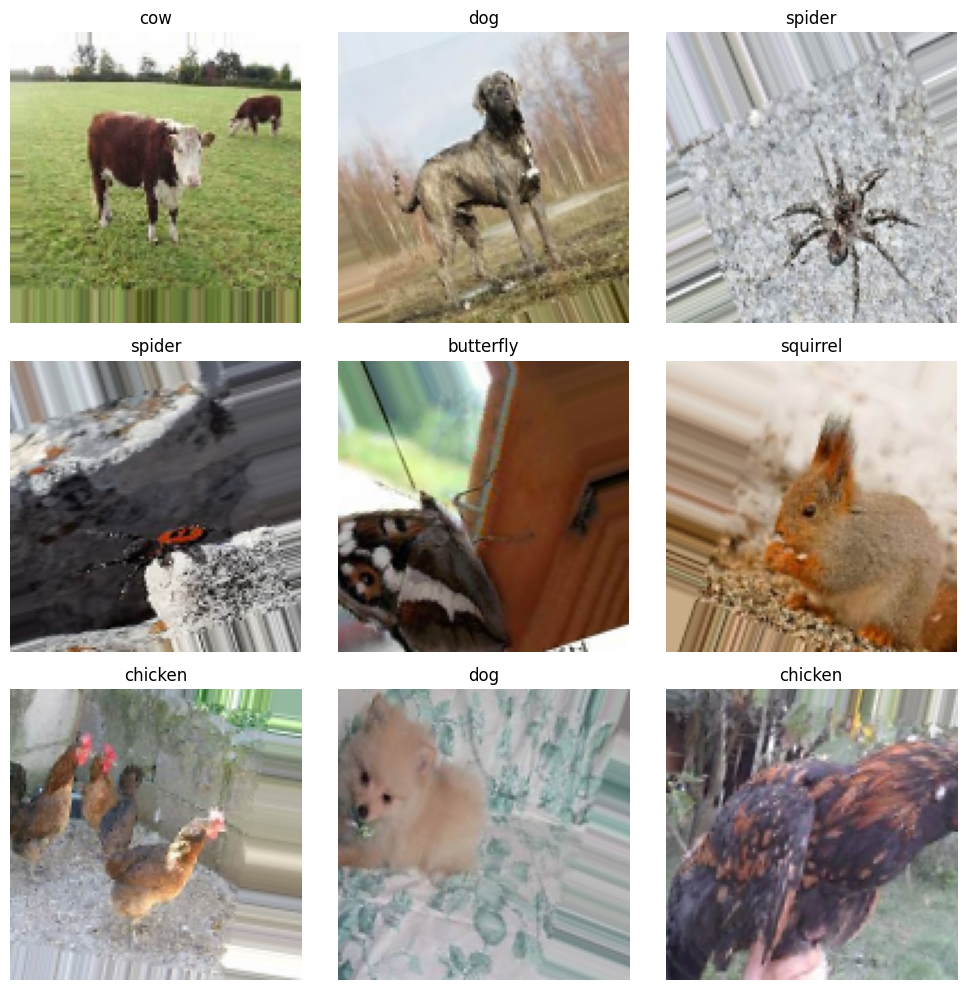

In [58]:
# Obtener un batch de imágenes y etiquetas
x_batch, y_batch = next(train_gen)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    label_index = np.argmax(y_batch[i])
    label_name = list(train_gen.class_indices.keys())[label_index]
    plt.title(label_name)
    plt.axis('off')

plt.tight_layout()
plt.show()